In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np

# Устройство (GPU или CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Параметры
latent_dim = 100
batch_size = 64
num_epochs = 50
sample_interval = 1000

# Загрузка данных MNIST
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

mnist = datasets.FashionMNIST(root='data', train=True, transform=transform, download=True)
dataloader = torch.utils.data.DataLoader(mnist, batch_size=batch_size, shuffle=True)

# Генератор
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 784),
            nn.Tanh()
        )

    def forward(self, z):
        return self.model(z).view(-1, 1, 28, 28)

# Дискриминатор
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, img):
        return self.model(img.view(-1, 784))

# Инициализация моделей
generator = Generator().to(device)
discriminator = Discriminator().to(device)

# Оптимизаторы
optimizer_G = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Функция потерь
criterion = nn.BCELoss()

# Визуализация
def save_generated_images(epoch):
    z = torch.randn(25, latent_dim).to(device)
    with torch.no_grad():
        generated_images = generator(z).cpu().numpy()
    generated_images = (generated_images + 1) / 2  # Приведение к диапазону [0, 1]

    plt.figure(figsize=(5, 5))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.imshow(generated_images[i, 0], cmap='gray')
        plt.axis('off')
    plt.savefig(f'gan_generated_epoch_{epoch}.png')
    plt.close()

# Обучение GAN
for epoch in range(num_epochs):
    for i, (imgs, _) in enumerate(dataloader):
        # Подготовка данных
        imgs = imgs.to(device)

        # Метки для реальных и фальшивых изображений
        real_labels = torch.ones(imgs.size(0), 1).to(device)
        fake_labels = torch.zeros(imgs.size(0), 1).to(device)

        # Обучение дискриминатора
        optimizer_D.zero_grad()
        outputs = discriminator(imgs)
        d_loss_real = criterion(outputs, real_labels)

        z = torch.randn(imgs.size(0), latent_dim).to(device)
        fake_imgs = generator(z)
        outputs = discriminator(fake_imgs.detach())
        d_loss_fake = criterion(outputs, fake_labels)

        d_loss = d_loss_real + d_loss_fake
        d_loss.backward()
        optimizer_D.step()

        # Обучение генератора
        optimizer_G.zero_grad()
        outputs = discriminator(fake_imgs)
        g_loss = criterion(outputs, real_labels)
        g_loss.backward()
        optimizer_G.step()

        # Визуализация
        if i % sample_interval == 0:
            print(f'Epoch [{epoch}/{num_epochs}], Step [{i}/{len(dataloader)}], D Loss: {d_loss.item()}, G Loss: {g_loss.item()}')

    save_generated_images(epoch)

print("Обучение завершено!")


100%|██████████| 26.4M/26.4M [00:01<00:00, 17.7MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 302kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 5.51MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 3.30MB/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw

Epoch [0/50], Step [0/938], D Loss: 1.3722364902496338, G Loss: 0.704797625541687
Epoch [1/50], Step [0/938], D Loss: 0.5773904323577881, G Loss: 3.8012564182281494
Epoch [2/50], Step [0/938], D Loss: 0.21466532349586487, G Loss: 3.0814898014068604
Epoch [3/50], Step [0/938], D Loss: 0.4116700291633606, G Loss: 4.029454231262207
Epoch [4/50], Step [0/938], D Loss: 0.6120745539665222, G Loss: 3.4815475940704346
Epoch [5/50], Step [0/938], D Loss: 0.7100803852081299, G Loss: 1.7006244659423828
Epoch [6/50], Step [0/938], D Loss: 0.9712797403335571, G Loss: 1.2378637790679932
Epoch [7/50], Step [0/938], D Loss: 0.9177835583686829, G Loss: 1.5419301986694336
Epoch [8/50], Step [0/938], D Loss: 1.1679407358169556, G Loss: 2.6288070678710938
Epoch [9/50], Step [0/938], D Loss: 1.0222058296203613, G Loss: 1.7500863075256348
Epoch [10/50], Step [0/938], D Loss: 1.1249569654464722, G Loss: 1.665050983428955
Epo

генератор шаг 0: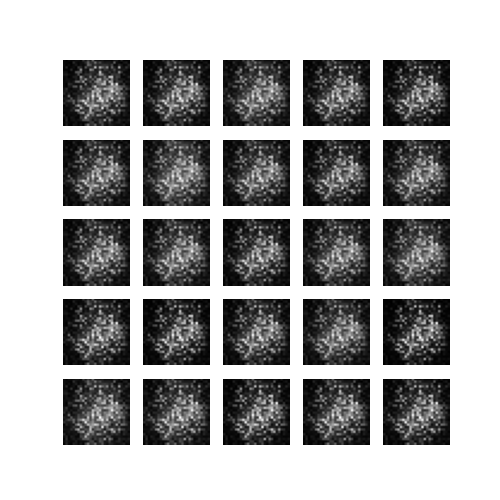

генератор последний шаг: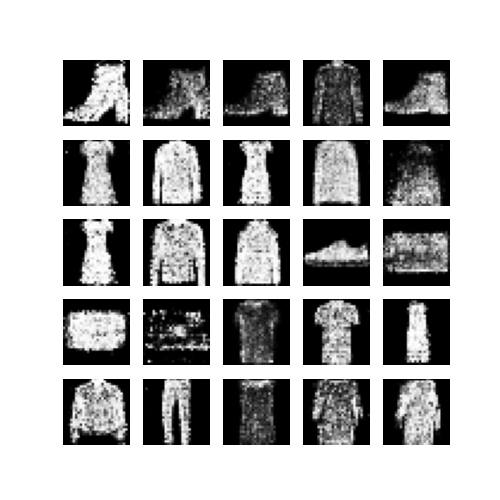